In [8]:
import requests
import pandas as pd
import json
from pandas.io.json import json_normalize  
import datetime as dt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from newspaper import Article

%matplotlib inline


In [9]:
with open('api_key.txt', 'r') as myfile:
    api_key=myfile.read()

#### Request top news articles from Norway

In [10]:
params = {
    'apiKey':api_key,
    'country':'no',
    'sources':'',
    'pageSize':100
}
url = 'https://newsapi.org/v2/top-headlines'
response = requests.get(url,params=params)
print(response)

<Response [200]>


#### Display the top 5

In [11]:
df_top = json_normalize(response.json()['articles'])
df_top.head(5)

,author,content,description,publishedAt,source.id,source.name,title,url,urlToImage
0,Bjørnar Hjellen,"De må ikke spørre folket, sier han i et interv...","Gian-Franco Kasper, den omstridte presidenten ...",2019-02-05T19:50:56Z,nrk,NRK,FIS-president Kasper vil arrangere OL i diktat...,https://www.nrk.no/sport/fis-president-kasper-...,https://gfx.nrk.no/UOtnKYHp0aDp9nFhZkGgqQ6VEB1...
1,Linn-Christin\n Marthinussen,- Jeg er helt knust og sorgen kan ikke beskriv...,Linni Meister i bunnløs sorg etter dødsfall.,2019-02-05T19:28:00Z,None,Dagbladet.no,- Jeg er helt knust og sorgen kan ikke beskriv...,https://www.dagbladet.no/kjendis/jeg-er-helt-k...,https://dbstatic.no/70736189.jpg?imageId=70736...
2,Ingvild Silseth,VENTER FORSONENDE TALE: Fellesskap vil trolig ...,Tonen president Donald Trump velger i den årli...,2019-02-05T19:04:00Z,None,Www.vg.no,Eksperter før nattens Trump-tale: – Kommer til...,https://www.vg.no/nyheter/utenriks/i/QleEoQ/ek...,https://smp.vgc.no/v2/images/6b03557b-d834-463...
3,TV 2 AS,Lindsey Vonn er inne i sin siste uke som alpin...,Og tidenes mestvinnende kvinnelige alpinist se...,2019-02-05T18:53:00Z,None,Www.tv2.no,Rådførte seg med Aksel før VM: - Vi fant ut at...,https://www.tv2.no/a/10394631/,http://www.cdn.tv2.no/images?imageId=10394701&...
4,None,En mannlig barnehageansatt er pågrepet og sikt...,Politiet holdt tirsdag kveld et informasjonsmø...,2019-02-05T18:52:35Z,None,Www.ba.no,Barnehage-ansatt siktet for seksuell handling ...,https://www.ba.no/nyheter/barnehage/politiet/b...,https://r.acdn.no/local/v3/publications/www.ba...


#### Get the complete article texts

In [12]:
def get_article_text(url):
    article = Article(url)
    article.download()
    article.parse()
    return article.text.replace('\n','')
df_top['content']=pd.DataFrame([get_article_text(x) for x in df_top['url'].values.tolist()])

#### Get all article content to one string

In [13]:
text = df_top.dropna().content.tolist()
text = " ".join(text)

#### Create wordcloud

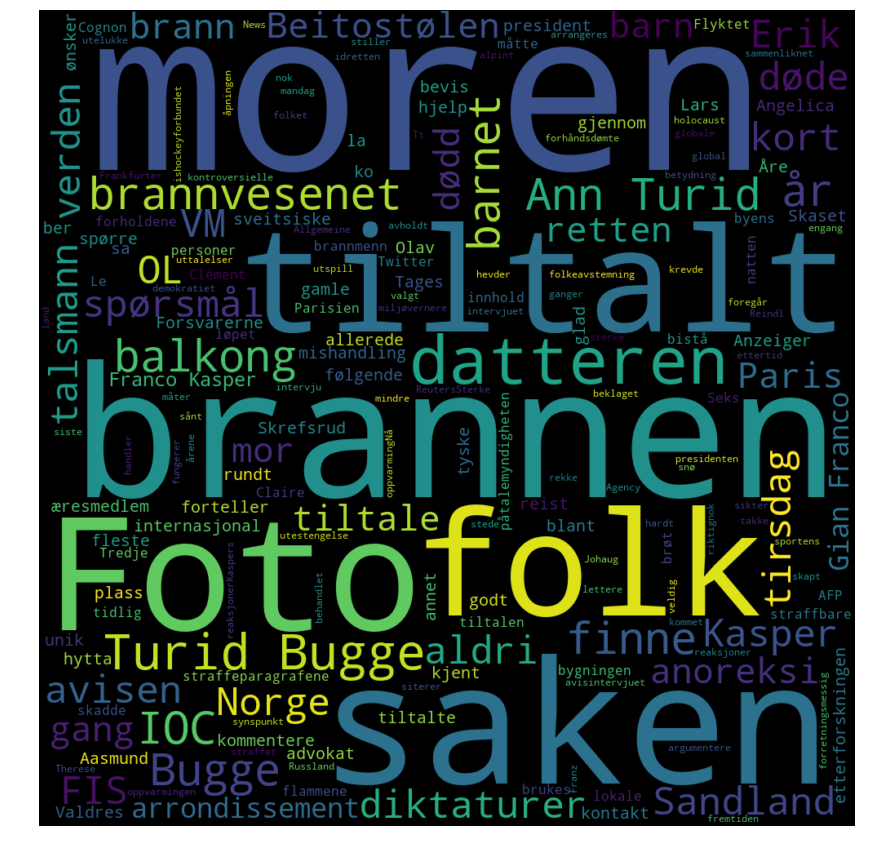

In [14]:
stopwords= set(STOPWORDS)
new_words =open(r'stopwords.txt').read().split()
new_stopwords=stopwords.union(new_words)
wordcloud = WordCloud(stopwords=new_stopwords, width=1000, height=1000).generate(text)

width = 15
height = 15
plt.figure(figsize=(width, height))


# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [10]:
import os
print(os.environ['PATH'])

C:\Users\Magnus\Anaconda3\envs\datascience;C:\Users\Magnus\Anaconda3\envs\datascience\Library\mingw-w64\bin;C:\Users\Magnus\Anaconda3\envs\datascience\Library\usr\bin;C:\Users\Magnus\Anaconda3\envs\datascience\Library\bin;C:\Users\Magnus\Anaconda3\envs\datascience\Scripts;C:\Users\Magnus\Anaconda3\envs\datascience\bin;C:\Users\Magnus\Anaconda3\condabin;C:\Program Files (x86)\Intel\iCLS Client\;C:\Program Files\Intel\iCLS Client\;C:\Windows\system32;C:\Windows;C:\Windows\System32\Wbem;C:\Windows\System32\WindowsPowerShell\v1.0\;C:\Program Files (x86)\Intel\Intel(R) Management Engine Components\DAL;C:\Program Files\Intel\Intel(R) Management Engine Components\DAL;C:\Program Files (x86)\Intel\Intel(R) Management Engine Components\IPT;C:\Program Files\Intel\Intel(R) Management Engine Components\IPT;C:\Program Files (x86)\NVIDIA Corporation\PhysX\Common;E:\Programmer\runtime\win64;E:\Programmer\bin;C:\WINDOWS\system32;C:\WINDOWS;C:\WINDOWS\System32\Wbem;C:\WINDOWS\System32\WindowsPowerShell\